In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ppg = pd.read_csv('ppg2008.csv')
costco = pd.read_csv('costcos-geocoded.csv')

In [3]:
ppg.head()

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


In [4]:
costco.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


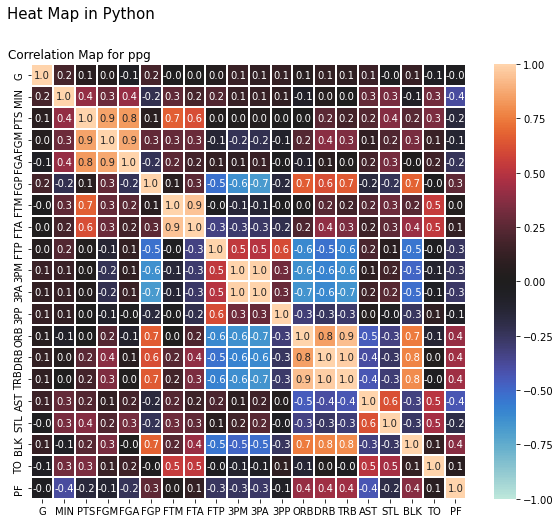

In [55]:
plt.subplots(figsize= (10,8))
sns.heatmap(ppg.corr(), vmin= -1, vmax= 1, center= 0, annot= True, fmt= '.1f', linewidths= .01, square= True)
plt.suptitle('Heat Map in Python', size= 15, x =0.21)
plt.title('Correlation Map for ppg', x= 0.11);

In [6]:
import matplotlib.patches as mpatches
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


In [7]:
cont = costco[(costco['State'] != 'Hawaii') & (costco['State'] != 'Alaska')]

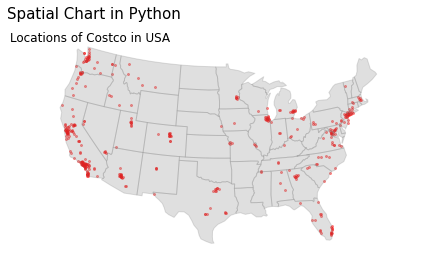

In [65]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(), frameon=False)
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)
ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(), color= 'gray', alpha= .25)
plt.scatter(
    x=costco["Longitude"],
    y=costco["Latitude"],
    color="red",
    s=4,
    alpha=.4,
    transform=ccrs.PlateCarree()
)
plt.suptitle('Spatial Chart in Python', size= 15, x= 0.2, y =1)
plt.title('Locations of Costco in USA', x= 0.19, y= .95)
plt.show()

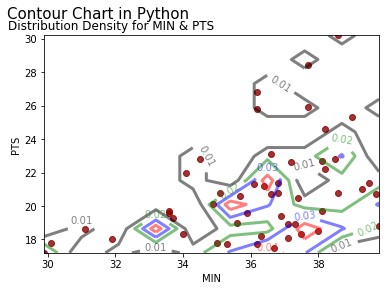

In [76]:
import numpy as np
from matplotlib.colors import LogNorm
# fig = plt.figure()
# ax = fig.add_subplot(111)
H, xedges, yedges = np.histogram2d(ppg['MIN'], ppg['PTS'], bins=10,normed=LogNorm())
# extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
# fig.subplots_adjust(bottom=0.15, left=0.15)
levels = (1.0e-2, 2.0e-2, 3.0e-2, 4.0e-2)
cset = plt.contour(H.transpose(),levels, extent=[xedges.min(),xedges.max(),
    yedges.min(),yedges.max()],linewidths=3,colors=['black','green','blue','red'],
    linestyles='solid', alpha = .5)
plt.clabel(cset, inline=1, fontsize=10, fmt='%.2f')
for c in cset.collections:
    c.set_linestyle('solid')
# plt.contour(H.transpose(),extent=[xedges.min(),xedges.max(),
#     yedges.min(),yedges.max()],linewidths=3,colors='black',
#     linestyles='solid')
plt.scatter(ppg['MIN'], ppg['PTS'],  color= 'darkred', alpha= .8)
plt.suptitle('Contour Chart in Python', size= 15, x= 0.25)
plt.title('Distribution Density for MIN & PTS', x= 0.2)
plt.xlabel('MIN') 
plt.ylabel('PTS');